## Data visualization lab

In [1]:
!pip install pandas seaborn matplotlib plotly scikit-learn ipywidgets

     ---------------------------------------- 9.9/9.9 MB 1.3 MB/s eta 0:00:00
     -------------------------------------- 139.8/139.8 kB 1.4 MB/s eta 0:00:00
     ------------------------------------ 425.0/425.0 kB 803.8 kB/s eta 0:00:00
     ------------------------------------ 914.9/914.9 kB 752.0 kB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 276.5 kB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


## SECTION 1 - Histograms and basic stats

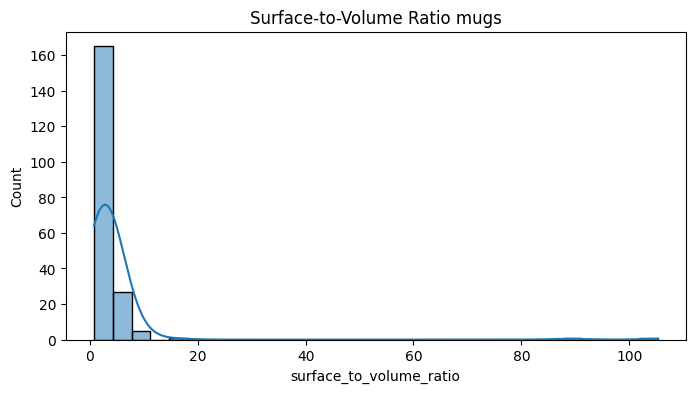

n 200
mean 4.047014702856071 std  9.563115667661638


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

# Load all data
root = Path('.')
fv_dir = root / 'feature_vectors'
csvs = sorted(fv_dir.glob('*_features.csv'))
dfs = [pd.read_csv(p).assign(category=p.stem.split('_')[0]) for p in csvs]
all_df = pd.concat(dfs, ignore_index=True)

# Helper function to find column by partial name
def find_col(df, target):
    t = target.lower()
    for c in df.columns:
        if t in c.lower().replace('_', ''):
            return c
    return None

# Plot histogram and stats for 'mug' Surface-to-Volume Ratio
col = 'surface_to_volume_ratio'
vals = pd.to_numeric(all_df[all_df['category']=='mug'][col], errors='coerce').dropna()
plt.figure(figsize=(8,4))
sns.histplot(vals, bins=30, kde=True)
plt.title('Surface-to-Volume Ratio mugs')
plt.show()

print('n', len(vals))
print('mean', vals.mean(), 'std ', vals.std())

In [4]:
all_df[all_df['category'] == 'mug']

,mean_curvature,median_curvature,surface_area,volume,silhouette_complexity,skeleton_complexity,aspect_ratio_y,hollow_ratio,surface_to_volume_ratio,category,source_file
600,13.939532,12.960924,77.774624,67.510761,4.958454,7.838753,1.260046,0.307140,1.152033,mug,mug_0000.obj
601,11.527616,12.317685,154.611652,32.010329,6.400382,6.702598,0.842894,0.134799,4.830055,mug,mug_0001.obj
602,14.516205,14.847195,111.236434,48.234901,16.483967,0.151497,0.885296,0.346850,2.306140,mug,mug_0002.obj
603,12.026504,13.174411,103.507756,41.793619,13.216478,7.448750,1.006974,0.569078,2.476640,mug,mug_0003.obj
604,7.160928,6.646808,115.960319,21.471447,10.265514,1.659217,0.900944,0.064255,5.400675,mug,mug_0004.obj
...,...,...,...,...,...,...,...,...,...,...,...
795,13.034364,13.130795,112.799133,31.605585,2.505852,0.000000,1.172735,0.034143,3.568962,mug,mug_0195.obj
796,10.416002,10.700504,81.832123,38.975112,15.914383,12.259964,1.003496,0.606226,2.099599,mug,mug_0196.obj
797,14.717930,15.897359,134.382307,79.817391,7.002536,8.185672,1.184039,0.402095,1.683622,mug,mug_0197.obj
798,9.156411,9.898785,164.697766,57.407859,0.572341,3.391880,1.052344,0.161951,2.868906,mug,mug_0198.obj


## SECTION 2 - Interactive comparison

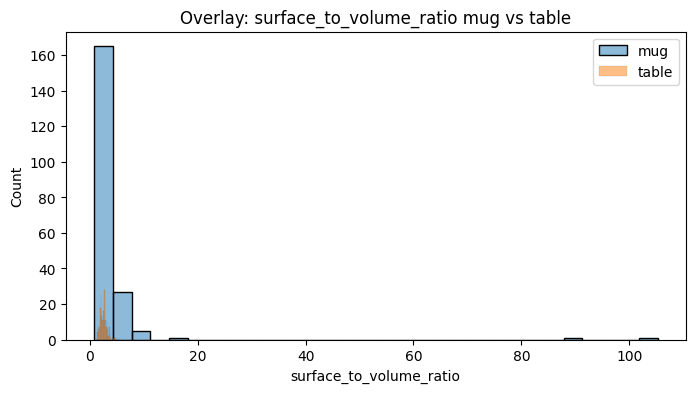

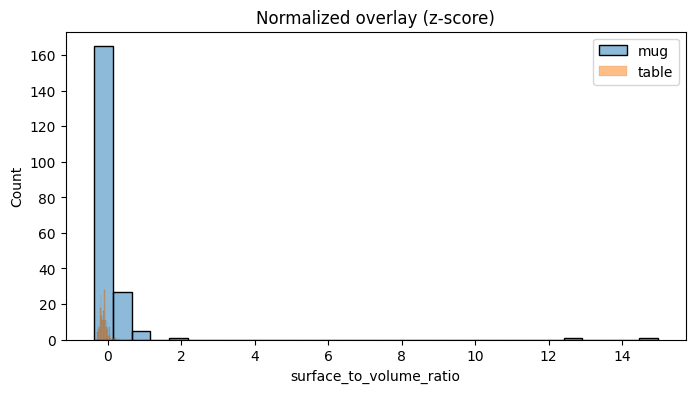

In [7]:
import numpy as np

# Overlay two categories
c1, c2 = 'mug', 'table'
f = 'surface_to_volume_ratio'
v1 = pd.to_numeric(all_df[all_df['category']==c1][f], errors='coerce').dropna()
v2 = pd.to_numeric(all_df[all_df['category']==c2][f], errors='coerce').dropna()

plt.figure(figsize=(8,4))
sns.histplot(v1, color='tab:blue', alpha=0.5, bins=30, label=c1)
sns.histplot(v2, color='tab:orange', alpha=0.5, bins=30, label=c2)
plt.legend()
plt.title(f'Overlay: {f} {c1} vs {c2}')
plt.show()

# Normalized (z-score) comparison
combined = pd.concat([v1, v2])
mu, sigma = combined.mean(), combined.std()
v1n = (v1 - mu) / sigma
v2n = (v2 - mu) / sigma

plt.figure(figsize=(8,4))
sns.histplot(v1n, color='tab:blue', alpha=0.5, bins=30, label=c1)
sns.histplot(v2n, color='tab:orange', alpha=0.5, bins=30, label=c2)
plt.legend()
plt.title('Normalized overlay (z-score)')
plt.show()

## SECTION 3 - Heatmaps and pairplot

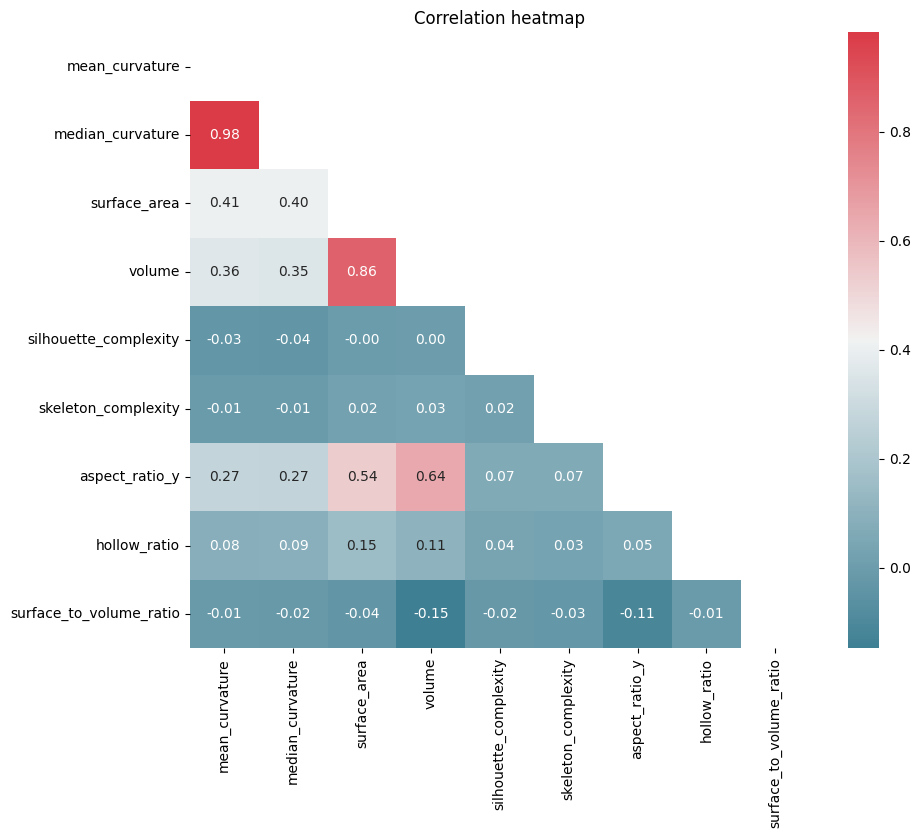

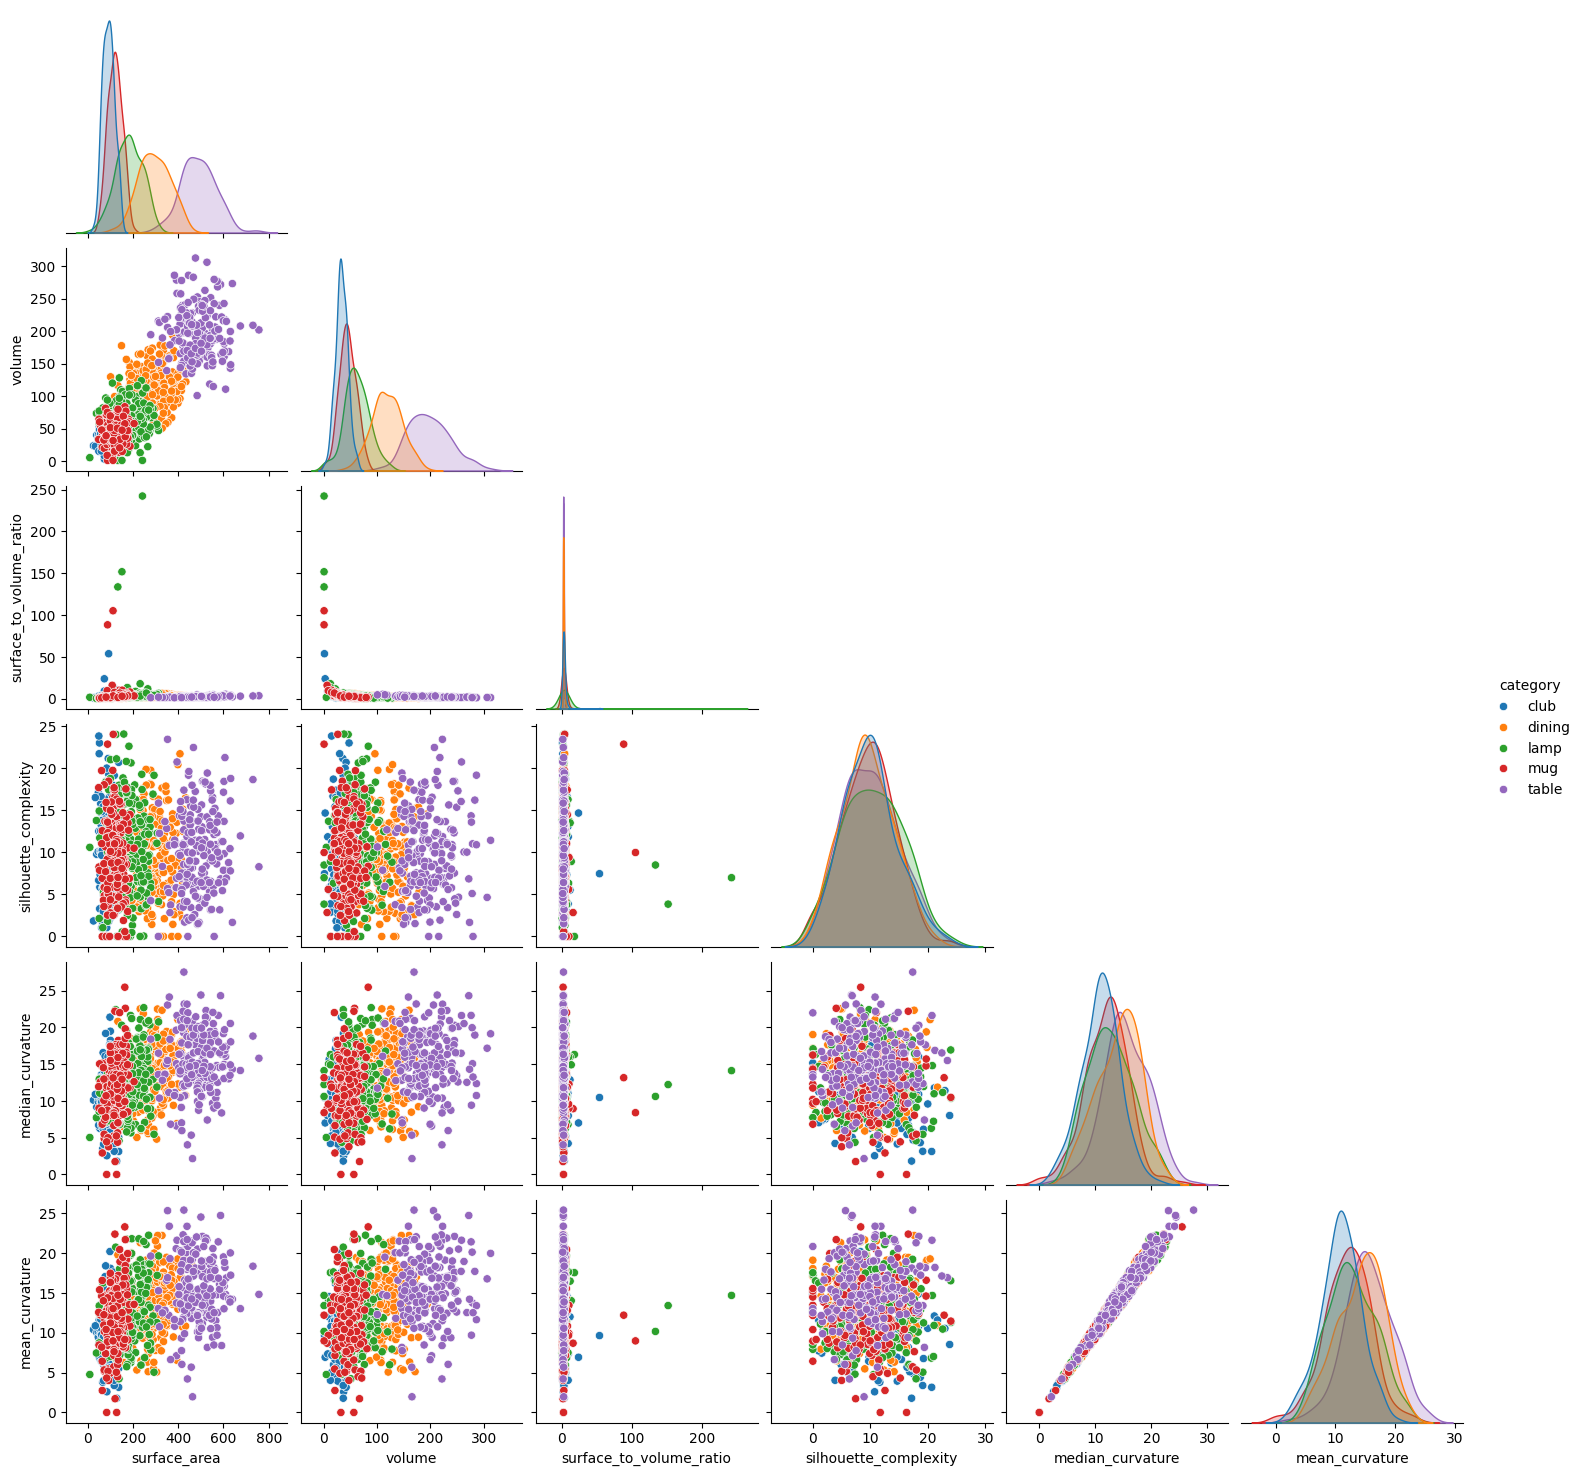

In [8]:
import numpy as np

num_cols = all_df.select_dtypes(include='number').columns.tolist()
cols = num_cols[:20]

# Correlation Heatmap
corr = all_df[cols].corr()
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, fmt='.2f')
plt.title('Correlation heatmap')
plt.show()

# Pairplot (top-6 features by variance)
top = all_df[cols].var().sort_values(ascending=False).index[:6].tolist()
sns.pairplot(all_df[top + ['category']].dropna(), hue='category', diag_kind='kde', corner=True)
plt.show()

## SECTION 4 - Rankings

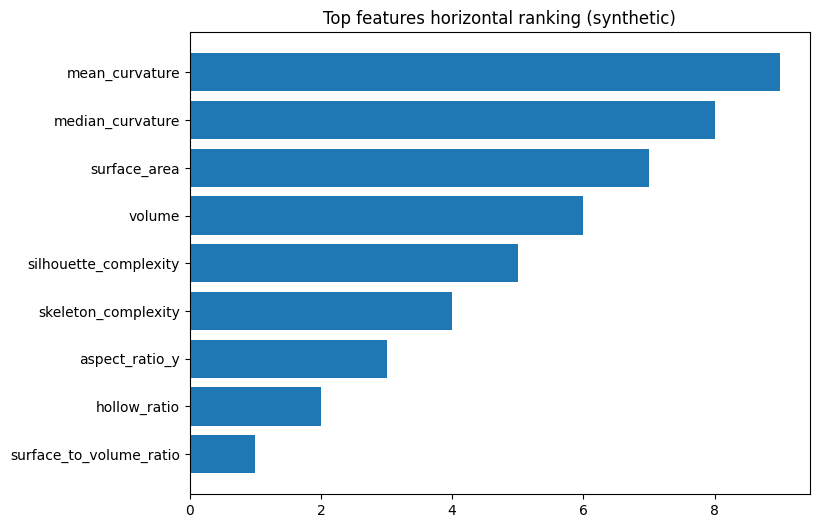

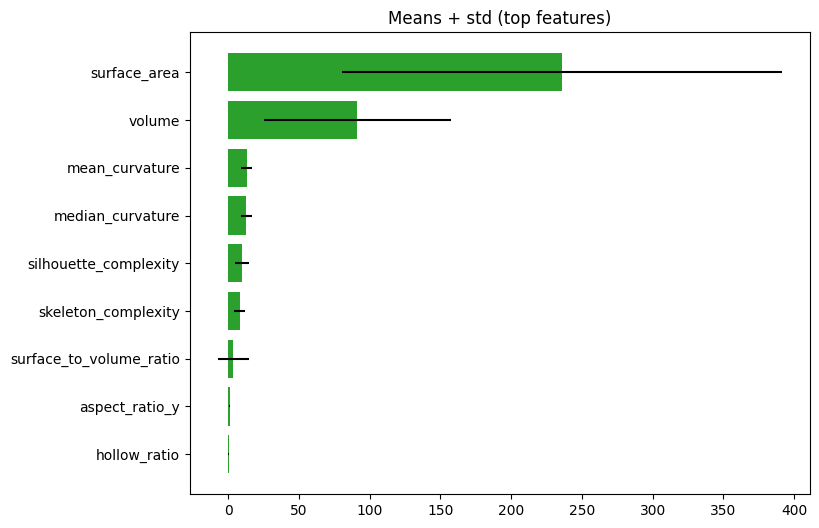

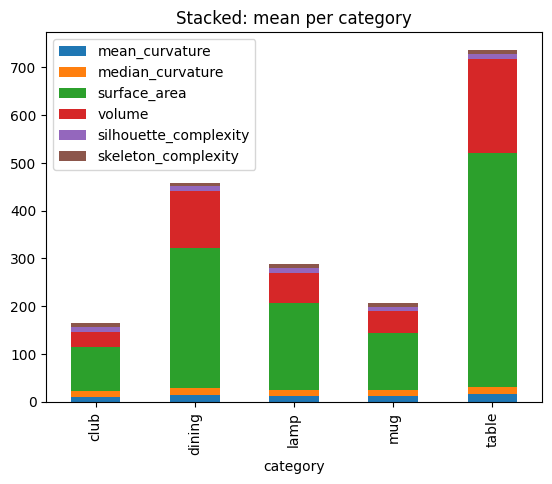

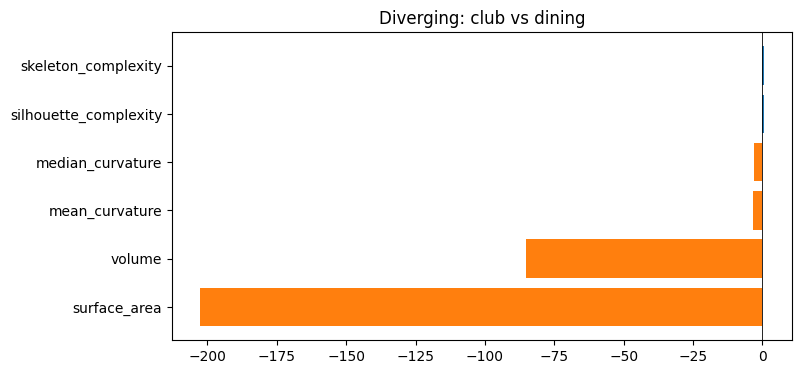

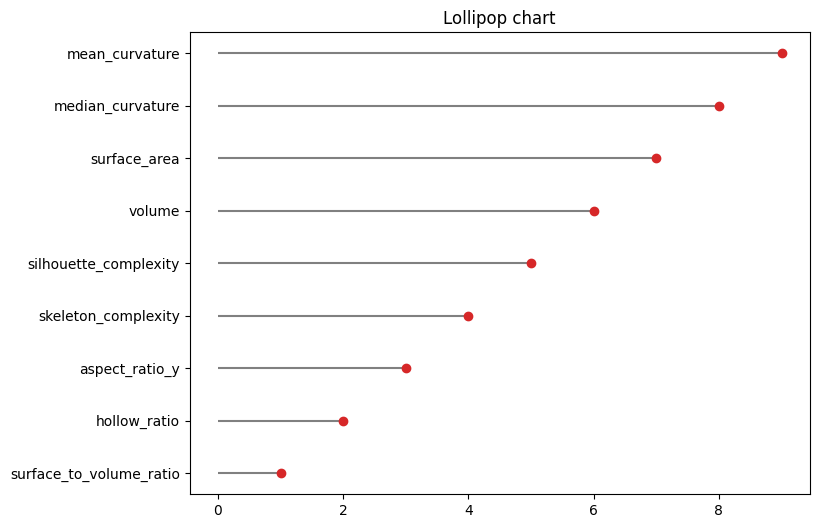

In [9]:
# Create a synthetic importance ranking for demonstration
rank_df = pd.DataFrame({'feature': cols, 'importance': np.linspace(1, len(cols), len(cols))[::-1]})
top_feats = rank_df['feature'].tolist()[:10]
feats = top_feats[:6] # Subset for stacked/diverging charts

# 1. Classic horizontal bar
top = rank_df.sort_values('importance', ascending=True).tail(15)
plt.figure(figsize=(8,6))
plt.barh(top['feature'], top['importance'], color='tab:blue')
plt.title('Top features horizontal ranking (synthetic)')
plt.show()

# 2. Error bars (Means + std)
means = all_df[top_feats].mean()
stds = all_df[top_feats].std()
order = means.sort_values(ascending=True).index
plt.figure(figsize=(8,6))
plt.barh(order, means[order], xerr=stds[order], color='tab:green')
plt.title('Means + std (top features)')
plt.show()

# 3. Stacked bar: mean per category
pivot = all_df.groupby('category')[feats].mean()
pivot.plot(kind='bar', stacked=True)
plt.title('Stacked: mean per category')
plt.show()

# 4. Diverging: difference between two categories
c1, c2 = sorted(all_df['category'].unique())[:2]
mean1 = all_df[all_df['category']==c1][feats].mean()
mean2 = all_df[all_df['category']==c2][feats].mean()
diff = (mean1 - mean2).sort_values()
plt.figure(figsize=(8,4))
colors = ['tab:blue' if v>0 else 'tab:orange' for v in diff.values]
plt.barh(diff.index, diff.values, color=colors)
plt.axvline(0, color='k', linewidth=0.6)
plt.title(f'Diverging: {c1} vs {c2}')
plt.show()

# 5. Lollipop
dfp = rank_df.sort_values('importance', ascending=True).tail(15)
plt.figure(figsize=(8,6))
plt.hlines(y=dfp['feature'], xmin=0, xmax=dfp['importance'], color='gray')
plt.plot(dfp['importance'], dfp['feature'], 'o', color='tab:red')
plt.title('Lollipop chart')
plt.show()

## SECTION 5 - Trends

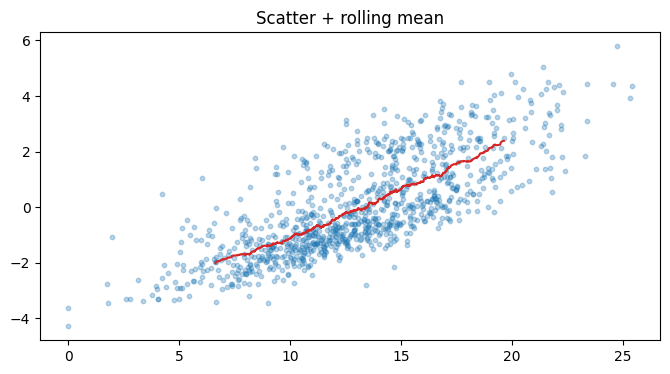

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Compute a proxy target (if no real score available)
num = all_df.select_dtypes(include='number').drop(columns=['source_file'], errors='ignore')
drop_ids = [c for c in num.columns if 'id' in c.lower() or c.lower().startswith('shape')]
num = num.drop(columns=drop_ids, errors='ignore')
X = StandardScaler().fit_transform(num.fillna(num.median()))
# Fit and transform to get the first principal component (PC1)
pc1 = PCA(n_components=1, random_state=0).fit_transform(X).ravel()
all_df['aesthetic_proxy'] = pc1

# Rolling trend example
f = 'mean_curvature'
target = 'aesthetic_proxy'
df = all_df[[f, target]].dropna().sort_values(f)
# Compute rolling mean (window is 12% of data length or min 5)
window_size = max(5, int(len(df)*0.12))
df['y_roll'] = df[target].rolling(window=window_size, center=True).mean()

plt.figure(figsize=(8,4))
plt.scatter(df[f], df[target], s=10, alpha=0.3)
plt.plot(df[f], df['y_roll'], color='tab:red')
plt.title('Scatter + rolling mean')
plt.show()

## Last part